0.02 50


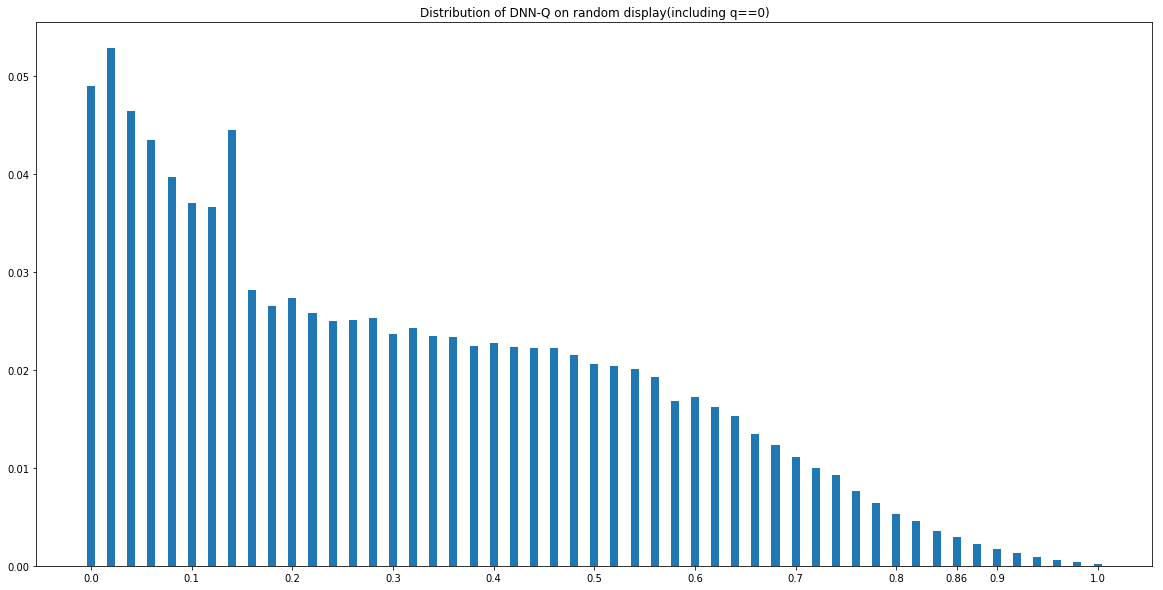

In [55]:

import pydev
import matplotlib.pyplot as plt

fd = file('data/user.analysis.out')

unit = 0.02
n = int(1.0 / unit)

print unit, n

offset = [i * 0.05 for i in range(n + 1)]
label = [str(i * unit) for i in range(n+1)]

counter = [0] * (1 + n)
total_disps = [0] * (1+n)
disp_dist = [[] for i in range(1+n)]
total_clicks = [0] * (1+n)
total_users = [0]*(1+n)
total = 0
for row in pydev.foreach_row(fd):
    cuid, maxq, ctr, disp, click = row
    maxq = float(maxq)
    disp = int(disp)
    click = int(click)
    
    idx = int(maxq*n)
    total_clicks[ idx ] += click
    total_disps[ idx ] += disp
    disp_dist[ idx ].append(disp)
    total_users[ idx ] += 1

    total += 1
    counter[ idx ] += 1

counter = map(lambda x:x*1./total, counter)

plt.figure(figsize=(20,10))
plt.bar(offset, counter, width=0.02)

f = filter(lambda x:int(x/0.05*unit*100)%5==0, offset)
plt.xticks(f, map(lambda x:x/0.05*unit, f))
plt.title('Distribution of DNN-Q on random display(including q==0)')
plt.show()

In [41]:

ctr = map(lambda x:x[0]*1./x[1], zip(total_clicks, total_disps))

avg_disp = map(lambda x:x[0]*1./x[1], zip(total_disps, total_users))




mid_disp = map(lambda x:sorted(x)[len(x)/2], disp_dist)

total_disp = sum(total_disps)
for idx in range(len(label)):
    print 'max_q=%4s: mid_disp_count=%d, total_users=%d(%.1f%%), total_disp=%d(%.1f%%)' % (
        label[idx], mid_disp[idx], total_users[idx], counter[idx]*100.,
        total_disps[idx], total_disps[idx]*100./total_disp
    )





max_q= 0.0: mid_disp_count=4, total_users=32689(12.5%), total_disp=169622(1.1%)
max_q=0.05: mid_disp_count=4, total_users=27646(10.6%), total_disp=204446(1.3%)
max_q= 0.1: mid_disp_count=5, total_users=24783(9.5%), total_disp=277932(1.7%)
max_q=0.15: mid_disp_count=7, total_users=20283(7.8%), total_disp=345058(2.1%)
max_q= 0.2: mid_disp_count=8, total_users=17222(6.6%), total_disp=418479(2.6%)
max_q=0.25: mid_disp_count=11, total_users=16284(6.2%), total_disp=619792(3.8%)
max_q= 0.3: mid_disp_count=16, total_users=15595(6.0%), total_disp=818844(5.1%)
max_q=0.35: mid_disp_count=23, total_users=14986(5.7%), total_disp=1033015(6.4%)
max_q= 0.4: mid_disp_count=32, total_users=14715(5.6%), total_disp=1273771(7.9%)
max_q=0.45: mid_disp_count=42, total_users=14237(5.5%), total_disp=1470930(9.1%)
max_q= 0.5: mid_disp_count=51, total_users=13347(5.1%), total_disp=1522747(9.4%)
max_q=0.55: mid_disp_count=61, total_users=12029(4.6%), total_disp=1539773(9.5%)
max_q= 0.6: mid_disp_count=72, total_u

In [50]:

# highest-Q analysis on position.
fd = file('data/user.maxq.diffpos.out')

total_user = 0
out4 = 0
diff4 = 0

out9 = 0
diff9 = 0
for cuid, topq, maxq, maxq_pos, total_pos in pydev.foreach_row(fd):
    total_user += 1
    maxq_pos = int(maxq_pos)
    maxq = float(maxq)
    topq = float(topq)
    if maxq_pos > 4:
        out4 += 1
        diff4 += maxq - topq
    if maxq_pos > 9:
        out9 += 1
        diff9 += maxq - topq

print '%d, %d, %.2f%% avg_diff=%.4f' % (out4, total_user, out4*100./total_user, diff4/out4)
print '%d, %d, %.2f%% avg_diff=%.4f' % (out9, total_user, out9*100./total_user, diff9/out9)



75929, 260999, 29.09% avg_diff=0.1011
53246, 260999, 20.40% avg_diff=0.1082
